# Fourier analysis

In [6]:
API_KEY = "W1HA5aezAFvkQEY7t713wl8V1jloQhWJ"

In [ ]:
"""
id                                description  \
0    4868                   4531e0a Uilenstede 5-461   
1    4902          4531g0b Uilenstede 5-61 (Toren 1)   
2    4903       4534g0b Uilenstede 155-211 (Toren 2)   
3    4904       4535g0b Uilenstede 405-461 (Toren 3)   
4    4905                 4520g0a Uilenstede 106-460   
5   24584                   4501e0a Uilenstede 2-460   
6   40752                   4504g0a UIlenstede 36-70   
7   40773                    4501g0a Uilenstede 2-32   
8   40812          4511g0b Uilenstede 102 e-h (trad)   
9   41574        4510g0b Uilenstede 102 a-d (H-inst)   
10  55788       4534e9b Uilenstede 155-211 (WKK BPM)   
11  55789       4535e9b Uilenstede 405-461 (WKK BPM)   
12  55790          4531e9b Uilenstede 5-61 (WKK BPM)   
13  55791  4525e9a Uilenstede 106-422 wkk3 (WKK BPM)   
14  55792  4525e9a Uilenstede 106-422 wkk2 (WKK BPM)   
15  55793  4525e9a Uilenstede 106-422 wkk1 (WKK BPM)   
16  55885            4526e9b Uilenstede 108 (PV BPM)   
17  55886        4525e9b Uilenstede 280-422 (PV BPM)   
18  55891        4511e9b Uilenstede 102 e-h (PV BPM)   
19  55892        4510e9b Uilenstede 102 a-d (PV BPM)   
20  55893        4538e9b Uilenstede 500-502 (PV BPM)   
21  55894        4525e9b Uilenstede 280-422 (PV BPM)   
22  55895        4538e9b Uilenstede 500-502 (PV BPM)   
23  76861           4531e9b Uilenstede 5-61 (PV BPM)   
24  76862        4534e9b Uilenstede 155-211 (PV BPM)   
25  76863        4535e9b Uilenstede 405-461 (PV BPM) """

In [3]:
# List of ids and descriptions 
# got rid of this 55789: '4535e9b Uilenstede 405-461 (WKK BPM)',
ids_and_descriptions = {
    4902: '4531g0b Uilenstede 5-61 (Toren 1)',   
    4903: '4534g0b Uilenstede 155-211 (Toren 2)',   
    4904: '4535g0b Uilenstede 405-461 (Toren 3)',
    4905: '4520g0a Uilenstede 106-460',
    40752: '4504g0a UIlenstede 36-70',
    40773: '4501g0a Uilenstede 2-32',
    40812: '4511g0b Uilenstede 102 e-h (trad)',   
    41574: '4510g0b Uilenstede 102 a-d (H-inst)',   
}

# Dictionary mapping meter IDs to building numbers
id_and_building = {
    4902: '4531',
    4903: '4534',
    4904: '4535',
    4905: '4520',
    40752: '4504',
    40773: '4501',
    40812: '4511',
    41574: '4510',
}

# List of building numbers and their respective area (Som van Som van NEN2580 GO)
buildings_and_area = {
    '4501': 1843,
    '4502': 831,
    '4503': 1432,
    '4504': 1801,
    '4505': 1112,
    '4506': 1605,
    '4508': 1665,
    '4510': 1798,
    '4511': 1534,
    '4520': 51766,
    '4521': None,
    '4522': 8553,
    '4523': 8553,
    '4524': 8203,
    '4525': 1448,
    '4531': 8555,
    '4534': 8553,
    '4535': 8552,
    '4536': 11101,
    '4537': 5425,
    '4538': 6860,
}
# Create a new dictionary that maps meter IDs to areas
ids_and_area = {}
for id, building in id_and_building.items():
    if building in buildings_and_area:
        ids_and_area[id] = buildings_and_area[building]

In [7]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import calendar

def get_gas_consumption(api_key, ids_and_descriptions, per, start_year, end_year):
    url = 'https://joulz.e-dataportal.nl/api/v3.1/aggregates/'
    params = {
        'apikey': api_key,
        'per': per,
    }

    gas_data = pd.DataFrame()
    for year in range(start_year, end_year):
        for month in range(1, 13):
            last_day_of_month = calendar.monthrange(year, month)[1]
            start_date = f'01-{month:02}-{year}'
            end_date = f'{last_day_of_month:02}-{month:02}-{year}'

            for meter_id, description in ids_and_descriptions.items():
                params['dap'] = str(meter_id)
                params['begin'] = start_date
                params['end'] = end_date

                response = requests.get(url, params=params)

                if response.status_code == 200:
                    df = pd.read_xml(response.content)
                    df['datetime'] = pd.to_datetime(df['datetime'])
                    df['meter_id'] = meter_id
                    df = df[['meter_id', 'datetime', 'value']]
                    gas_data = pd.concat([gas_data, df], ignore_index=True)
                else:
                    print(f'Request failed with status code {response.status_code}')
    
    return gas_data

In [8]:
gas_data = get_gas_consumption(API_KEY,ids_and_descriptions,'hourly',2020,2023)

In [15]:
print(gas_data)

        meter_id                   datetime  value
0           4902  2020-01-01 01:00:00+01:00   43.0
1           4902  2020-01-01 02:00:00+01:00   42.0
2           4902  2020-01-01 03:00:00+01:00   44.0
3           4902  2020-01-01 04:00:00+01:00   43.0
4           4902  2020-01-01 05:00:00+01:00   45.0
...          ...                        ...    ...
210427     41574  2022-12-31 20:00:00+01:00    4.5
210428     41574  2022-12-31 21:00:00+01:00    4.4
210429     41574  2022-12-31 22:00:00+01:00    4.8
210430     41574  2022-12-31 23:00:00+01:00    4.2
210431     41574  2023-01-01 00:00:00+01:00    4.4

[210432 rows x 3 columns]


## Fourier analysis
The rolling mean can be useful for analyzing and modeling the underlying patterns and fluctuations in the time-series data, as well as for removing noise and reveal underlying trends in the data.
The result of rolling mean is a smoothed version of the original time series, where each data point is replaced by the mean of the data points in its 24-hour window.

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocess the data
meter_id = 4902  # Replace this with the desired meter ID
gas_data_filtered = gas_data[gas_data['meter_id'] == meter_id].copy()
gas_data_filtered['datetime'] = pd.to_datetime(gas_data_filtered['datetime'], utc=True)
gas_data_filtered = gas_data_filtered.set_index('datetime')


# Detrend the data (remove linear trend) 
# After calculating the rolling mean, the code subtracts this rolling mean from the original data to detrend it. 
gas_data_rolled = gas_data_filtered.rolling(window=24, center=True).mean().dropna()
gas_data_detrended = gas_data_filtered -gas_data_rolled
gas_data_detrended = gas_data_detrended.dropna()

In [146]:
print(gas_data_detrended)
print(gas_data_rolled)

                           meter_id     value
datetime                                     
2020-01-01 12:00:00+00:00       0.0  3.500000
2020-01-01 13:00:00+00:00       0.0  3.291667
2020-01-01 14:00:00+00:00       0.0  3.083333
2020-01-01 15:00:00+00:00       0.0  7.000000
2020-01-01 16:00:00+00:00       0.0  3.916667
...                             ...       ...
2022-12-31 08:00:00+00:00       0.0 -6.666667
2022-12-31 09:00:00+00:00       0.0 -4.625000
2022-12-31 10:00:00+00:00       0.0 -2.291667
2022-12-31 11:00:00+00:00       0.0  6.875000
2022-12-31 12:00:00+00:00       0.0  3.375000

[26281 rows x 2 columns]
                           meter_id      value
datetime                                      
2020-01-01 12:00:00+00:00    4902.0  49.500000
2020-01-01 13:00:00+00:00    4902.0  49.708333
2020-01-01 14:00:00+00:00    4902.0  49.916667
2020-01-01 15:00:00+00:00    4902.0  50.000000
2020-01-01 16:00:00+00:00    4902.0  50.083333
...                             ...        ...


In [149]:
print(gas_data_detrended['value'])

datetime
2020-01-01 12:00:00+00:00    3.500000
2020-01-01 13:00:00+00:00    3.291667
2020-01-01 14:00:00+00:00    3.083333
2020-01-01 15:00:00+00:00    7.000000
2020-01-01 16:00:00+00:00    3.916667
                               ...   
2022-12-31 08:00:00+00:00   -6.666667
2022-12-31 09:00:00+00:00   -4.625000
2022-12-31 10:00:00+00:00   -2.291667
2022-12-31 11:00:00+00:00    6.875000
2022-12-31 12:00:00+00:00    3.375000
Name: value, Length: 26281, dtype: float64


Text(0.5, 1.0, 'gas data rolling window')

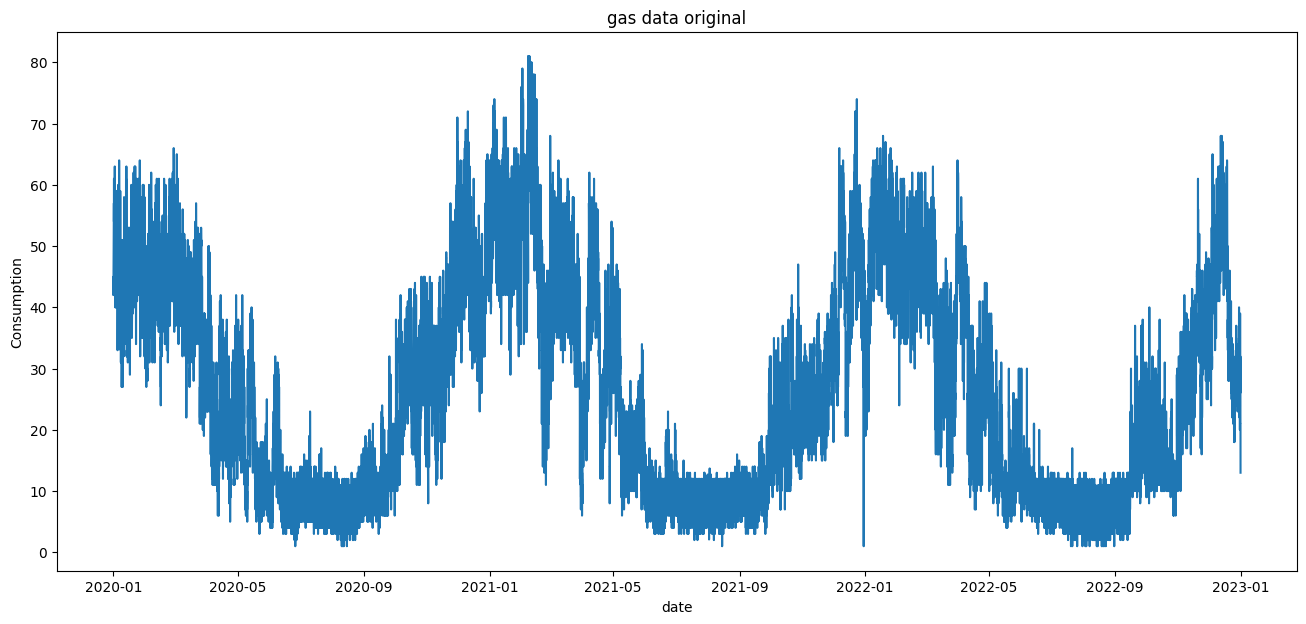

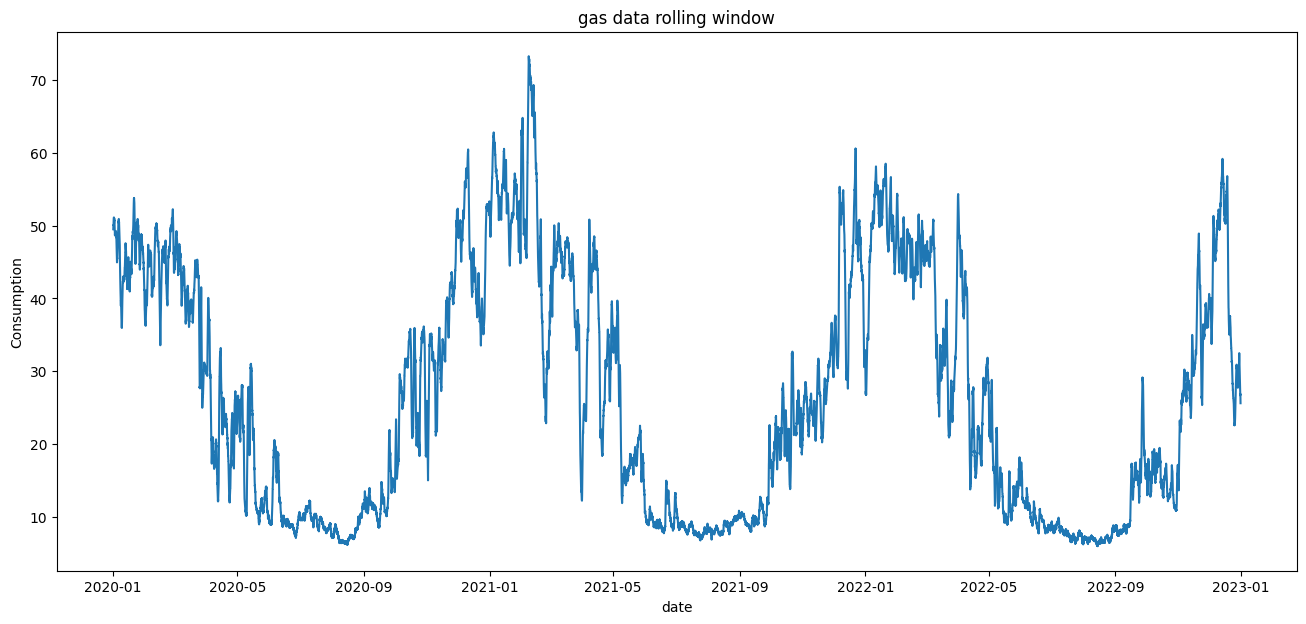

In [86]:
# Plot the original data
plt.figure(figsize=(16, 7))
plt.plot(gas_data_filtered['value'])
plt.xlabel('date')
plt.ylabel('Consumption')
plt.title('gas data original')

# Plot the rolled data
plt.figure(figsize=(16, 7))
plt.plot(gas_data_rolled['value'])
plt.xlabel('date')
plt.ylabel('Consumption')
plt.title('gas data rolling window')

## Compute the Fast Fourier Transform (FFT)

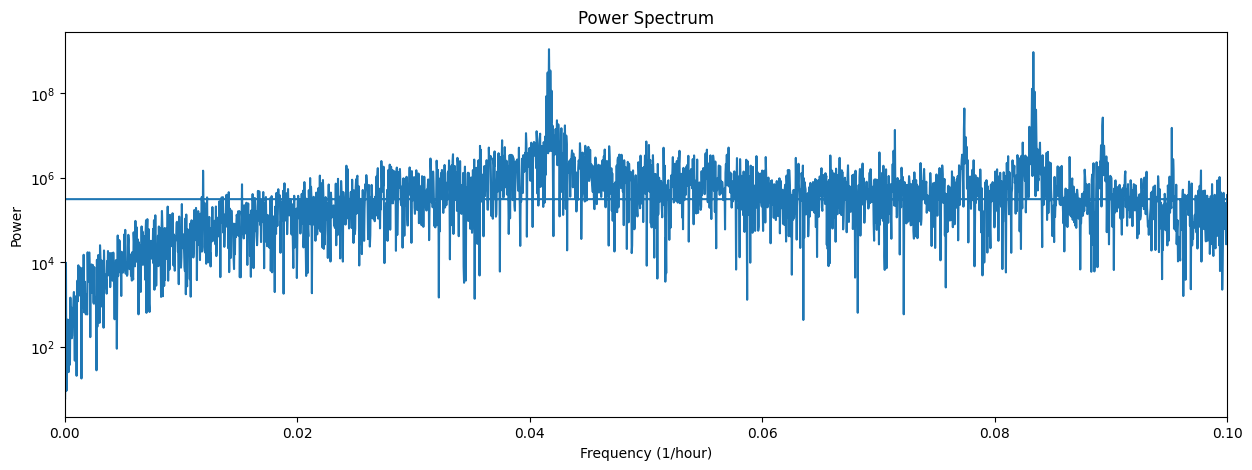

Significant frequencies: [ 0.04166508 -0.04166508 -0.08333016  0.08333016 -0.04177923]


In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Remove rows with NaN values from gas_data_detrended
gas_data_clean = gas_data_detrended.dropna()

# Compute the Fast Fourier Transform (FFT)
fft_result = np.fft.fft(gas_data_clean['value'])
freqs = np.fft.fftfreq(len(fft_result), 1)  # Here, 1/24 is the frequency unit (1/hour)

plt.figure(figsize=(15, 5))
plt.plot(freqs, np.abs(fft_result)**2)
plt.xlabel('Frequency (1/hour)')
plt.ylabel('Power')
plt.title('Power Spectrum')
plt.xlim(0, 0.1)  # Adjust the range to your preference
plt.yscale('log')  # Use a log scale for the y-axis
plt.show()


# Identify the most significant frequencies
n_peaks = 5  # Number of peaks to identify
peaks = np.argsort(-np.abs(fft_result)**2)[:n_peaks]
peak_freqs = freqs[peaks]

print('Significant frequencies:', peak_freqs)


## Reconstruct and plot individual sinusoids and their sum

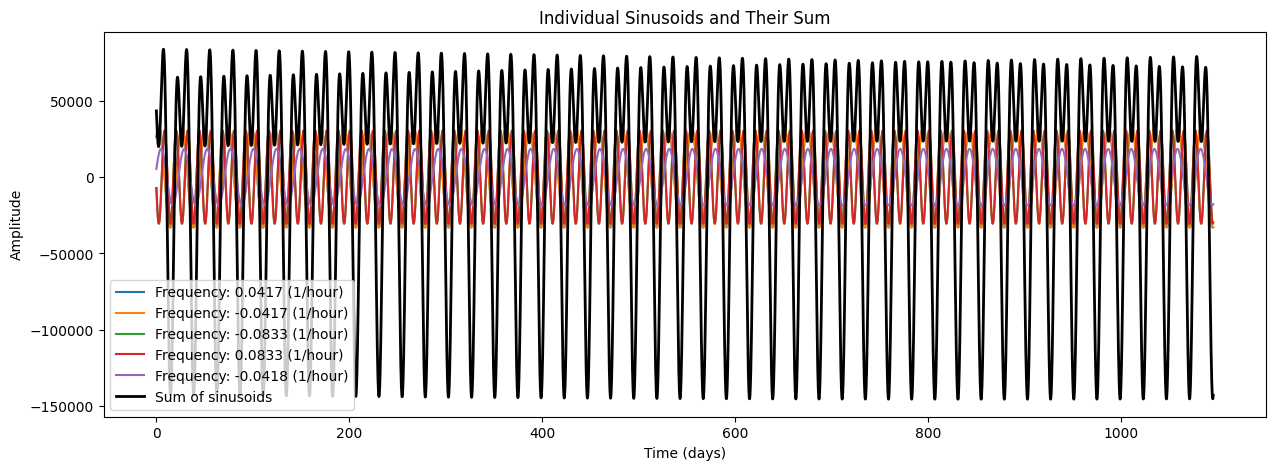

In [162]:
def sinusoid(time, amplitude, frequency, phase):
    return amplitude * np.cos(2 * np.pi * frequency * time + phase)

# Extract amplitude and phase information for significant frequencies
amplitudes = np.abs(fft_result[peaks])
phases = np.angle(fft_result[peaks])

# Generate time values for the period you want to analyze
time_values = np.arange(0, len(gas_data_clean), 1) / 24  # Divide by 24 to get the time in days

# Reconstruct and plot individual sinusoids and their sum
sum_sinusoids = np.zeros_like(time_values)
plt.figure(figsize=(15, 5))

for amplitude, frequency, phase in zip(amplitudes, peak_freqs, phases):
    sinusoid_signal = sinusoid(time_values, amplitude, frequency, phase)
    sum_sinusoids += sinusoid_signal
    plt.plot(time_values, sinusoid_signal, label=f'Frequency: {frequency:.4f} (1/hour)')

plt.plot(time_values, sum_sinusoids, label='Sum of sinusoids', color='black', linewidth=2)
plt.xlabel('Time (days)')
plt.ylabel('Amplitude')
plt.title('Individual Sinusoids and Their Sum')
plt.legend()
plt.show()

FFT result: [-2.66666667-2.27373675e-13j  0.22346306-2.40911945e+00j
 -6.97005258-2.14144197e+00j ... 41.35947082-8.98914421e+01j
 -6.97005258+2.14144197e+00j  0.22346306+2.40911945e+00j]
Results:
           freq        power        period
1      0.000038     5.853792  26281.000000
2      0.000076    53.167407  13140.500000
3      0.000114  9791.077185   8760.333333
4      0.000152     9.247472   6570.250000
5      0.000190    10.136864   5256.200000
...         ...          ...           ...
26276 -0.000190    10.136864  -5256.200000
26277 -0.000152     9.247472  -6570.250000
26278 -0.000114  9791.077185  -8760.333333
26279 -0.000076    53.167407 -13140.500000
26280 -0.000038     5.853792 -26281.000000

[26280 rows x 3 columns]


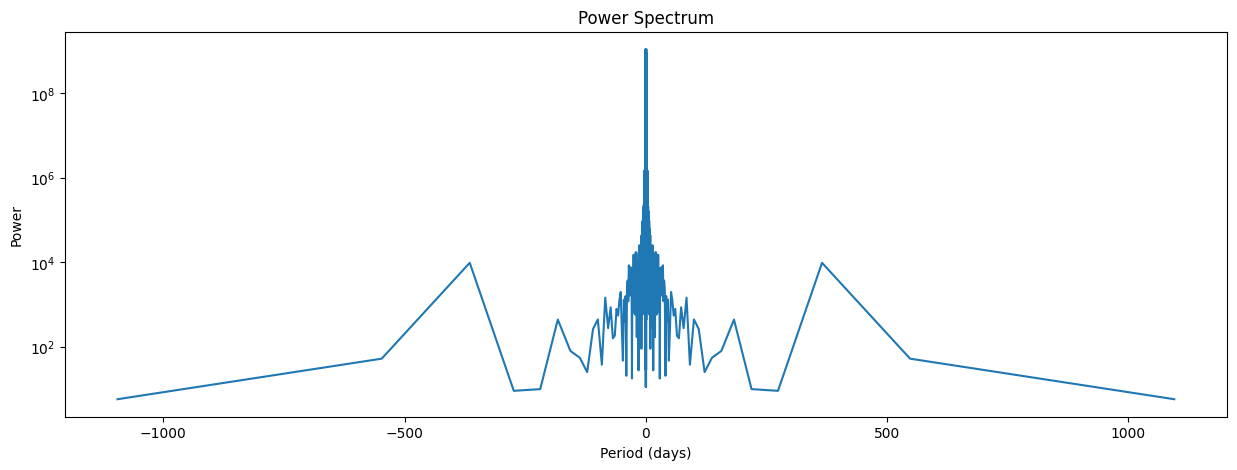

In [163]:
import pandas as pd

# Remove rows with NaN values from gas_data_detrended
gas_data_clean = gas_data_detrended.dropna()

# Compute the Fast Fourier Transform (FFT)
fft_result = np.fft.fft(gas_data_clean['value'])
print("FFT result:", fft_result)  # Check the FFT result

freqs = np.fft.fftfreq(len(fft_result), 1)  # 1 hour

# Create a DataFrame to store frequency, power, and period information
results = pd.DataFrame({'freq': freqs, 'power': np.abs(fft_result)**2})
results['period'] = 1 / results['freq']

# Remove the row with frequency 0 (infinite period)
results = results[results['freq'] != 0]

print("Results:")
print(results)

# Convert period to days
results['period_days'] = results['period'] / 24

# Plot the power spectrum using period
plt.figure(figsize=(15, 5))
plt.plot(results['period_days'], results['power'])
plt.xlabel('Period (days)')
plt.ylabel('Power')
plt.yscale('log')  # Use logarithmic scale for the y-axis
plt.title('Power Spectrum')
plt.show()


FFT result: [-2.66666667-2.27373675e-13j  0.22346306-2.40911945e+00j
 -6.97005258-2.14144197e+00j ... 41.35947082-8.98914421e+01j
 -6.97005258+2.14144197e+00j  0.22346306+2.40911945e+00j]
Results:
           freq          power        period
1      0.000038       5.853792  26281.000000
2      0.000076      53.167407  13140.500000
3      0.000114    9791.077185   8760.333333
4      0.000152       9.247472   6570.250000
5      0.000190      10.136864   5256.200000
...         ...            ...           ...
13136  0.499829  204861.800311      2.000685
13137  0.499867  188969.701790      2.000533
13138  0.499905  367410.708078      2.000381
13139  0.499943   41644.445737      2.000228
13140  0.499981  312569.645122      2.000076

[13140 rows x 3 columns]


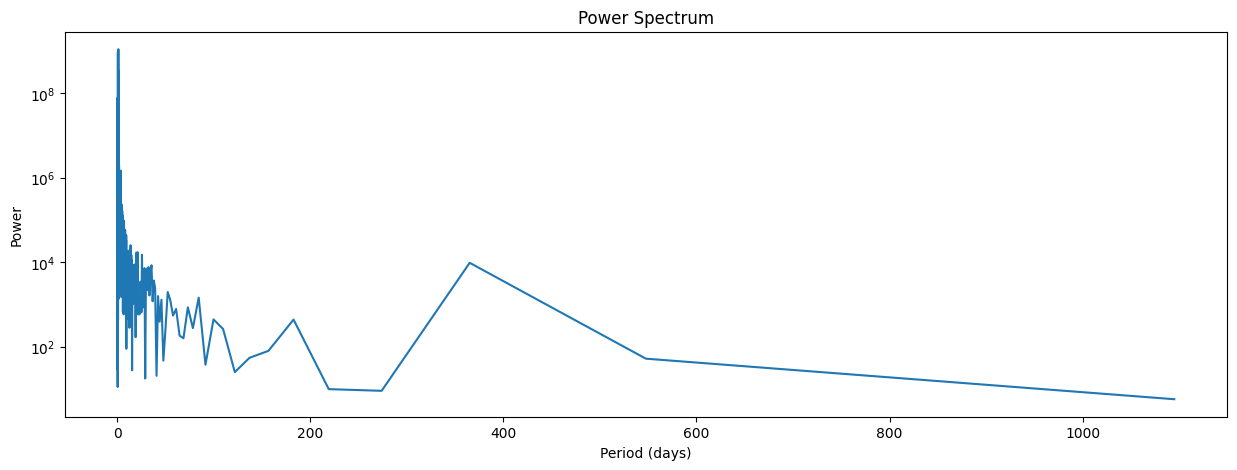

In [164]:
import pandas as pd

# Remove rows with NaN values from gas_data_detrended
gas_data_clean = gas_data_detrended.dropna()

# Compute the Fast Fourier Transform (FFT)
fft_result = np.fft.fft(gas_data_clean['value'])
print("FFT result:", fft_result)  # Check the FFT result

freqs = np.fft.fftfreq(len(fft_result), 1)  # 1 hour

# Create a DataFrame to store frequency, power, and period information
results = pd.DataFrame({'freq': freqs, 'power': np.abs(fft_result)**2})
results['period'] = 1 / results['freq']

# Remove the row with frequency 0 (infinite period)
results = results[results['freq'] != 0]

# Select only positive frequencies
results = results[results['freq'] > 0]

print("Results:")
print(results)

# Convert period to days
results['period_days'] = results['period'] / 24

# Plot the power spectrum using period
plt.figure(figsize=(15, 5))
plt.plot(results['period_days'], results['power'])
plt.xlabel('Period (days)')
plt.ylabel('Power')
plt.yscale('log')  # Use logarithmic scale for the y-axis
plt.title('Power Spectrum')
plt.show()


## Reconstruct the data by significant frequencies: 

Significant frequencies: [ 0.04166508 -0.04166508 -0.08333016  0.08333016 -0.04177923]


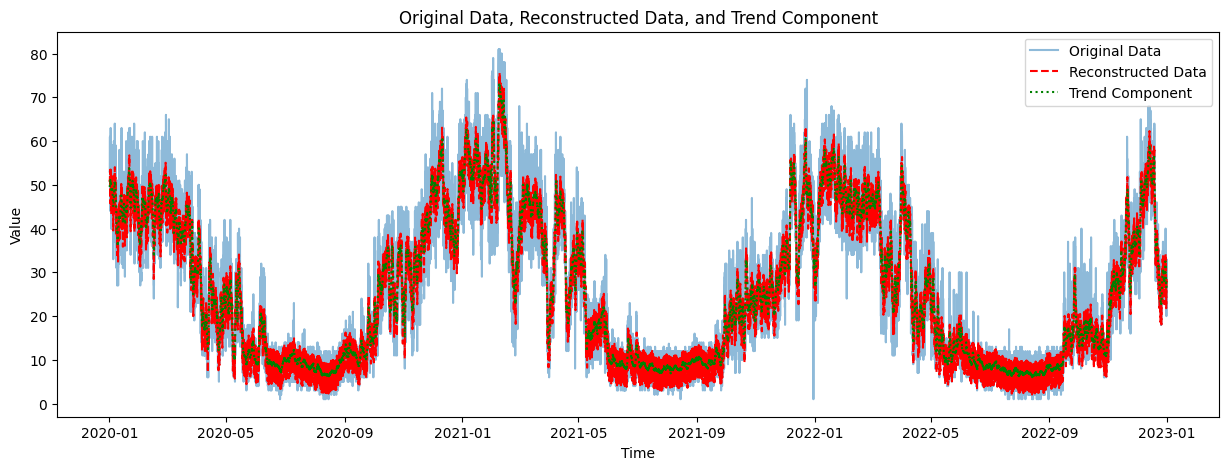

In [173]:
import numpy as np

# Step 1: Identify the significant frequencies
n_peaks = 5  # Number of peaks to identify
peaks = np.argsort(-np.abs(fft_result)**2)[:n_peaks]
peak_freqs = freqs[peaks]

print('Significant frequencies:', peak_freqs)

# Step 2: Create a filtered FFT result
filtered_fft_result = np.zeros_like(fft_result)
filtered_fft_result[peaks] = fft_result[peaks]

# Step 3: Perform the Inverse Fast Fourier Transform (IFFT)
reconstructed_data_complex = np.fft.ifft(filtered_fft_result)

# Step 4: Extract the real part of the IFFT result
reconstructed_data = np.real(reconstructed_data_complex)

# Step 5: Add back the trend (gas_data_rolled) to the reconstructed_data
reconstructed_data_with_trend = reconstructed_data + gas_data_rolled['value'].values

# Plot the original data, the reconstructed data, and the trend component
plt.figure(figsize=(15, 5))
plt.plot(gas_data_detrended.index, gas_data_filtered.loc[gas_data_detrended.index, 'value'], label='Original Data', alpha=0.5)
plt.plot(gas_data_detrended.index, reconstructed_data_with_trend, label='Reconstructed Data', linestyle='--', color='red')
plt.plot(gas_data_rolled.index, gas_data_rolled['value'], label='Trend Component', linestyle=':', color='green')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original Data, Reconstructed Data, and Trend Component')
plt.legend()
plt.show()

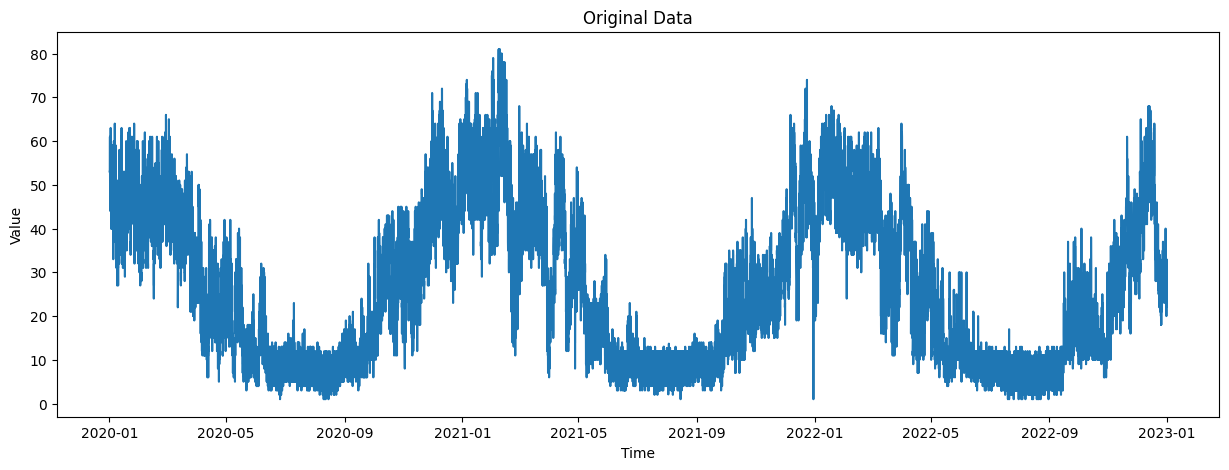

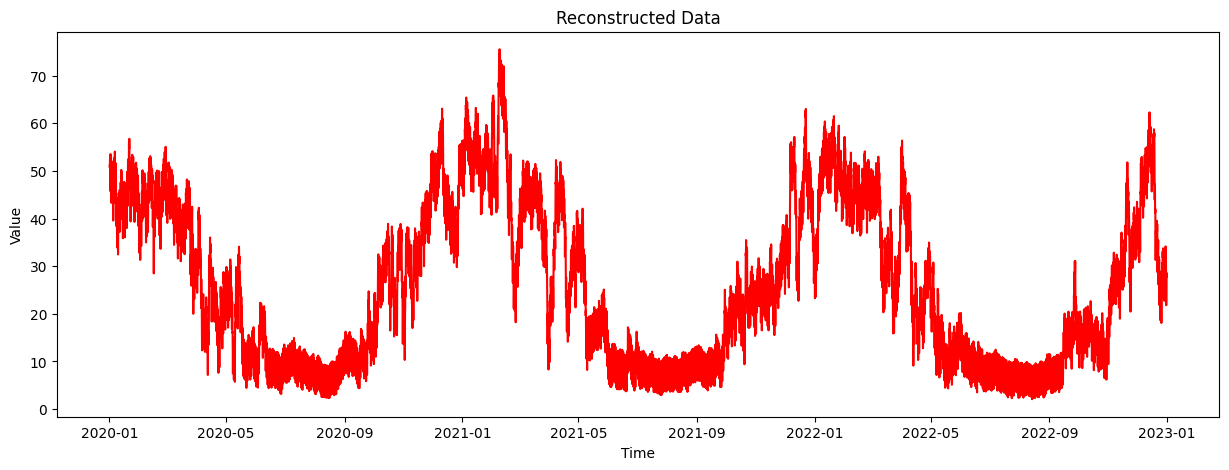

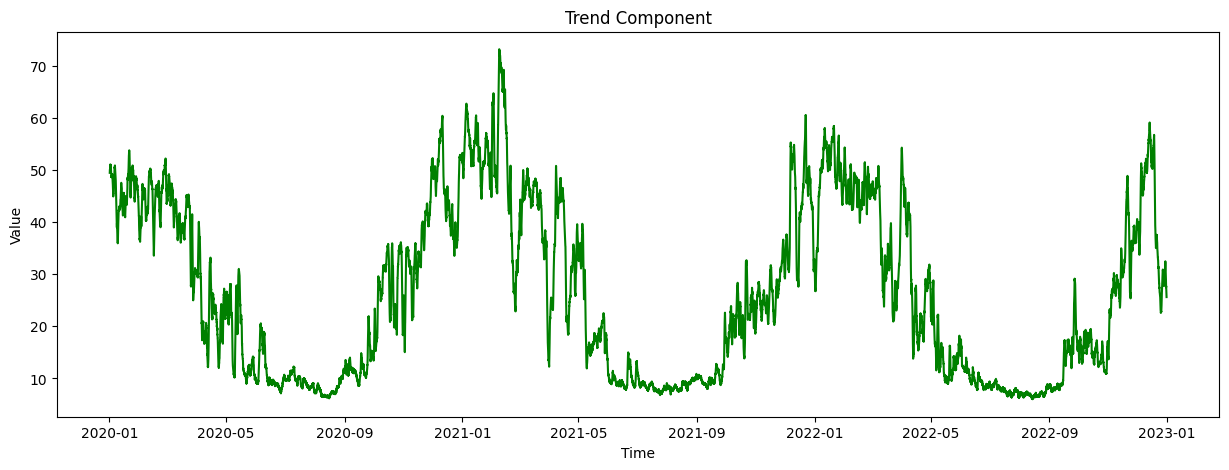

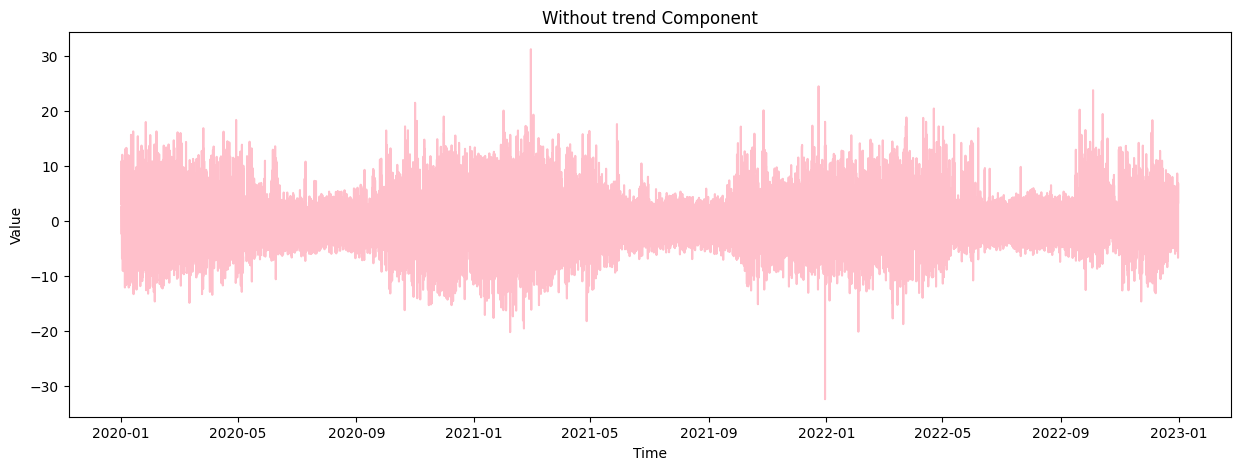

In [177]:
# Plot the original data
plt.figure(figsize=(15, 5))
plt.plot(gas_data_detrended.index, gas_data_filtered.loc[gas_data_detrended.index, 'value'], label='Original Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original Data')
plt.show()

# Plot the reconstructed data
plt.figure(figsize=(15, 5))
plt.plot(gas_data_detrended.index, reconstructed_data_with_trend, label='Reconstructed Data', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Reconstructed Data')
plt.show()

# Plot the trend component
plt.figure(figsize=(15, 5))
plt.plot(gas_data_rolled.index, gas_data_rolled['value'], label='Trend Component', color='green')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Trend Component')
plt.show()

# Plot the data without trend
plt.figure(figsize=(15, 5))
plt.plot(gas_data_rolled.index, gas_data_detrended['value'], label='Trend Component', color='pink')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Without trend Component')
plt.show()


In [179]:
!jupyter nbconvert --to html Fourier_analysis.ipynb

[NbConvertApp] Converting notebook Fourier_analysis.ipynb to html
[NbConvertApp] Writing 1883685 bytes to Fourier_analysis.html
